In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing the blanks with 0 as tenure is 0 and also changing the data type of total charges

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df['customerID'].duplicated().sum()

0

converting senior citizen values from 0 and 1 to yes or no

In [23]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [31]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


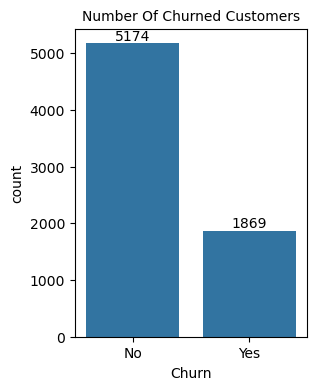

In [22]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x ='Churn',data = df)

ax.bar_label(ax.containers[0])
plt.title('Number Of Churned Customers', fontsize = 10)
plt.show()

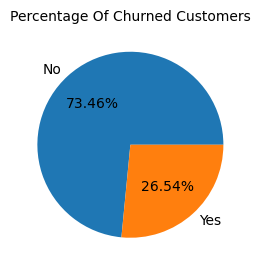

In [30]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title('Percentage Of Churned Customers', fontsize = 10)
plt.show()

From the above graphs we can say that 26.54% of our customers have churned out.

Exploring the reason behind it.

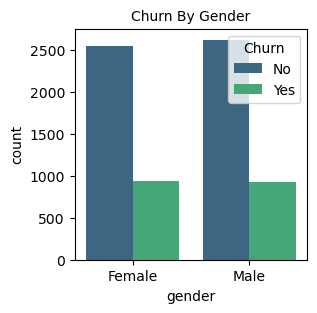

In [10]:
plt.figure(figsize = (3,3))

sns.countplot(x = 'gender' , data = df, hue = 'Churn', palette = 'viridis' )
plt.title('Churn By Gender',fontsize = 10)
plt.show()

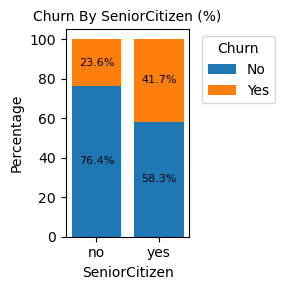

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100
fig, ax = plt.subplots(figsize=(3, 3))

bottom = [0] * len(percent_data)
colors = ['#1f77b4', '#ff7f0e']  # Customize if needed

for i, col in enumerate(percent_data.columns):
    ax.bar(percent_data.index, percent_data[col], bottom=bottom, label=col, color=colors[i])
    for j, val in enumerate(percent_data[col]):
        if val > 0:
            ax.text(j, bottom[j] + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=8)
    bottom = [bottom[k] + percent_data[col].iloc[k] for k in range(len(bottom))]

ax.set_title('Churn By SeniorCitizen (%)', fontsize=10)
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

comparatively a greater percentage of people in the senior citizen category have churned out.

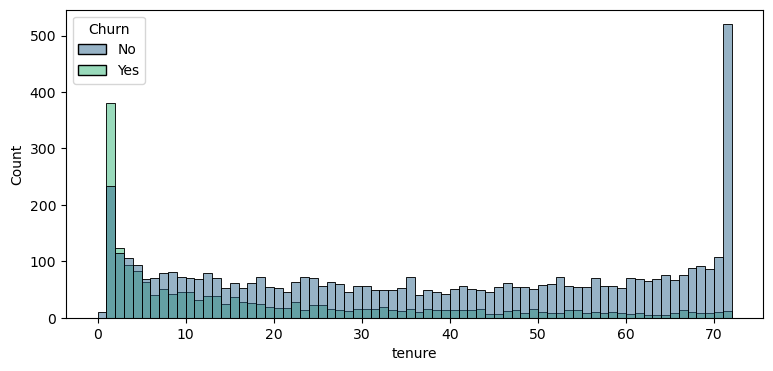

In [12]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure' , data = df, bins = 72, hue = 'Churn',palette = 'viridis' )
plt.show()

People who have used our services for a long time have stayed wheras people who have used our services for a month have churned out

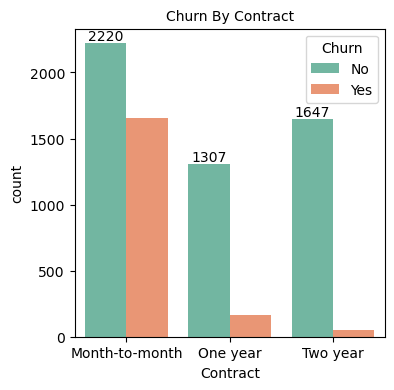

In [32]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x = 'Contract' , data = df, hue = 'Churn',palette='Set2')
ax.bar_label(ax.containers[0])
plt.title('Churn By Contract',fontsize = 10)
plt.show()

people who have month to month contract are more likely to churn out than those who have one or two year contract.

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

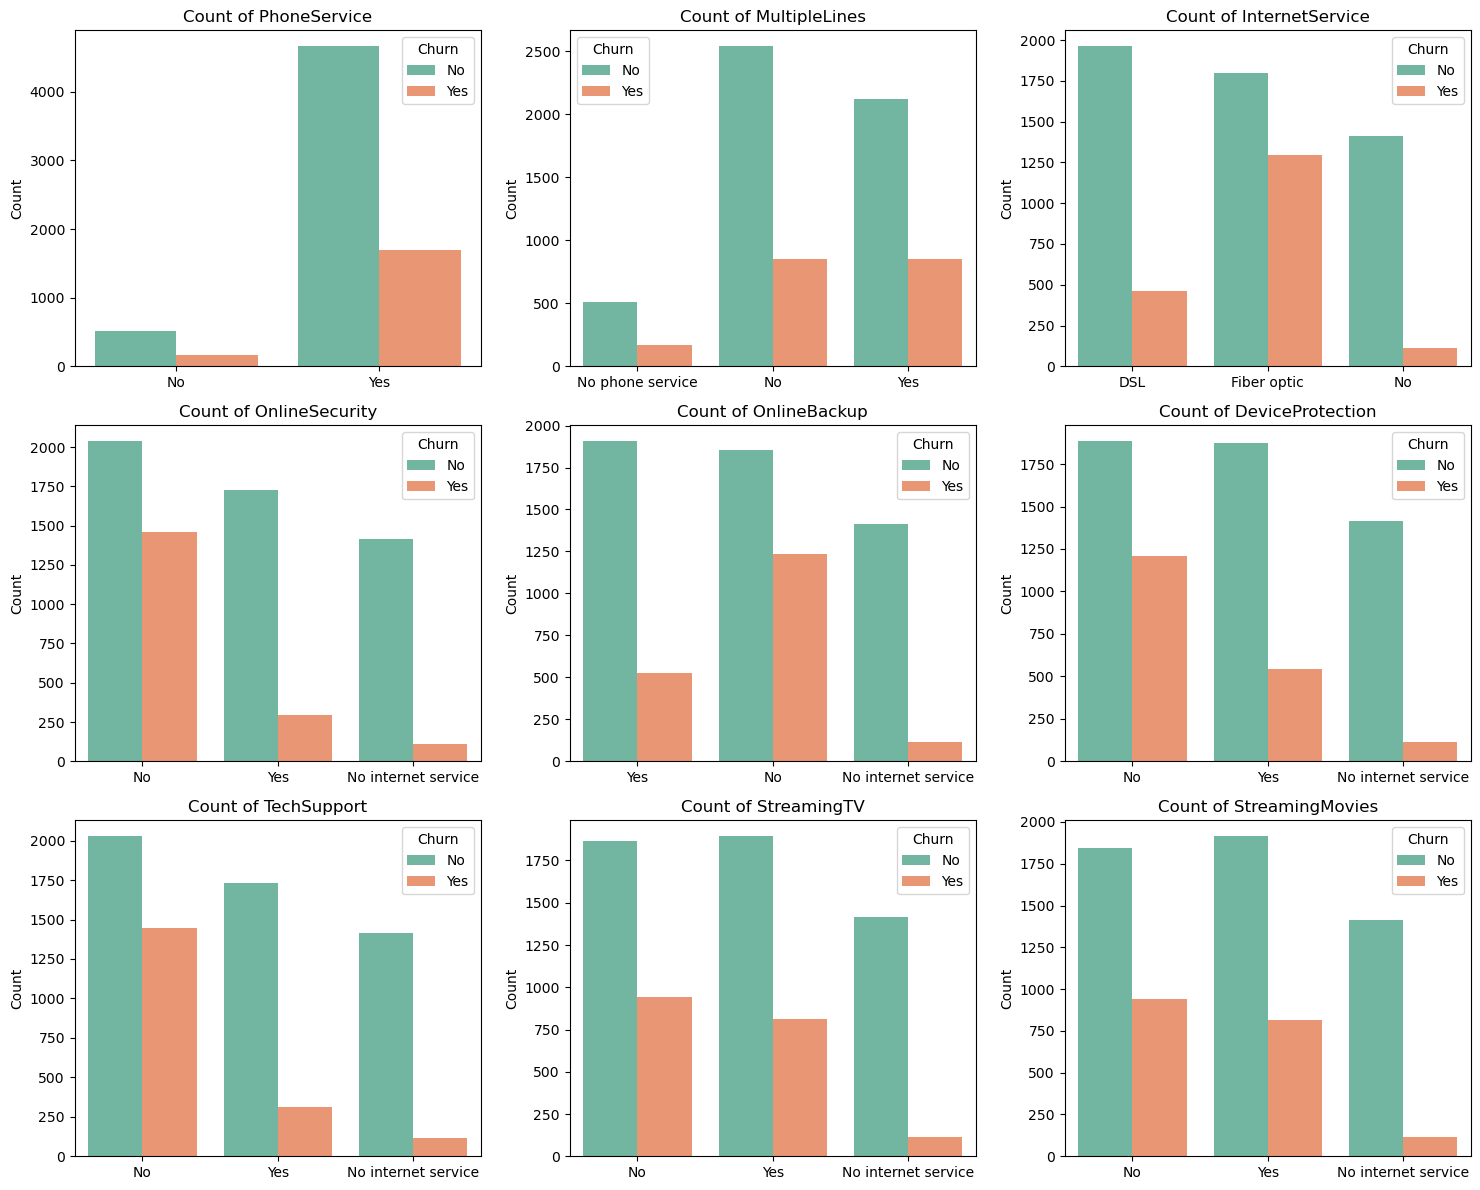

In [14]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = -(-len(columns) // n_cols)  # ceiling division


plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, data=df, hue = 'Churn', palette='Set2')
    plt.title(f'Count of {col}')
    plt.xlabel('')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


The plots reveal that customers lacking value-added services like OnlineSecurity, TechSupport, OnlineBackup, and DeviceProtection show significantly higher churn rates, indicating these features may contribute to customer retention. Notably, users with Fiber optic internet also churn more compared to DSL or those without internet service. In contrast, services like StreamingTV and StreamingMovies show a more neutral impact on churn.

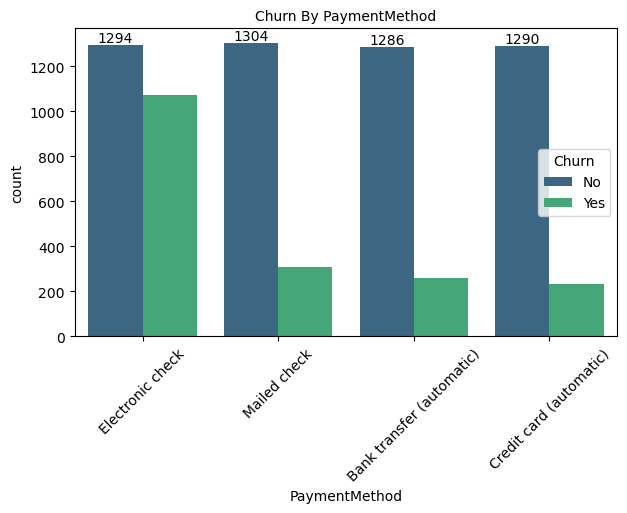

In [18]:
plt.figure(figsize = (7,4))

ax = sns.countplot(x = 'PaymentMethod' , data = df, hue = 'Churn',palette = 'viridis' )
ax.bar_label(ax.containers[0])
plt.title('Churn By PaymentMethod',fontsize = 10)
plt.xticks(rotation = 45)
plt.show()

customers are likely to churn when they are using electronic check as the payment method.

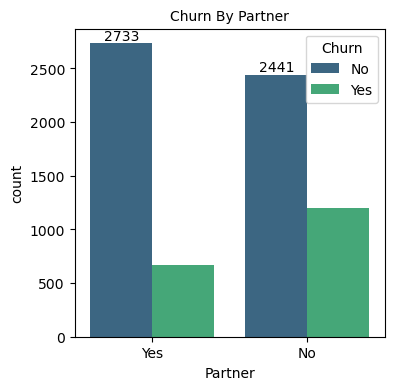

In [40]:
plt.figure(figsize = (4,4))

ax = sns.countplot(x = 'Partner' , data = df, hue = 'Churn',palette='viridis')
ax.bar_label(ax.containers[0])
plt.title('Churn By Partner',fontsize = 10)
plt.show()

From the above it is more likely that people without a partner churn out more than people with one.